In [ ]:
Link to download the dataset - https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#ProblemStatement

# **Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Importing the dataset**

In [2]:
dataset_train = pd.read_csv('./drive/My Drive/Analytics Vidhya Challenges/Loan Prediction/train.csv')
dataset_test = pd.read_csv('./drive/My Drive/Analytics Vidhya Challenges/Loan Prediction/test.csv')

Study the datasets

In [3]:
 dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [5]:
dataset_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
dataset_test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

# **Data Preprocessing - 1**

Taking care of duplicate values

In [7]:
dataset_train.duplicated().sum()

0

In [8]:
dataset_test.duplicated().sum()

0

Taking care of null/missing values

In [9]:
dataset_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
dataset_train['Gender'] = dataset_train['Gender'].fillna(dataset_train['Gender'].mode()[0])

In [11]:
dataset_train['Married'] = dataset_train['Married'].fillna(dataset_train['Married'].mode()[0])

In [12]:
dataset_train['Dependents'] = dataset_train['Dependents'].fillna(dataset_train['Dependents'].mode()[0])

In [13]:
dataset_train['LoanAmount'] = dataset_train['LoanAmount'].fillna(dataset_train['LoanAmount'].median())
dataset_train['Loan_Amount_Term'] = dataset_train['Loan_Amount_Term'].fillna(dataset_train['Loan_Amount_Term'].mode()[0])

In [14]:
dataset_train['Self_Employed'] = dataset_train['Self_Employed'].fillna(dataset_train['Self_Employed'].mode()[0])
dataset_train['Credit_History'] = dataset_train['Credit_History'].fillna(dataset_train['Credit_History'].mode()[0])

In [15]:
dataset_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [16]:
dataset_test['Gender'] = dataset_test['Gender'].fillna(dataset_test['Gender'].mode()[0])
dataset_test['Dependents'] = dataset_test['Dependents'].fillna(dataset_test['Dependents'].mode()[0])
dataset_test['Self_Employed'] = dataset_test['Self_Employed'].fillna(dataset_test['Self_Employed'].mode()[0])
dataset_test['LoanAmount'] = dataset_test['LoanAmount'].fillna(dataset_test['LoanAmount'].median())
dataset_test['Loan_Amount_Term'] = dataset_test['Loan_Amount_Term'].fillna(dataset_test['Loan_Amount_Term'].mode()[0])
dataset_test['Credit_History'] = dataset_test['Credit_History'].fillna(dataset_test['Credit_History'].mode()[0])

In [17]:
dataset_train['TotalIncome'] = dataset_train['ApplicantIncome'] + dataset_train['CoapplicantIncome']

# **Exploratory Data Analysis**

In [18]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


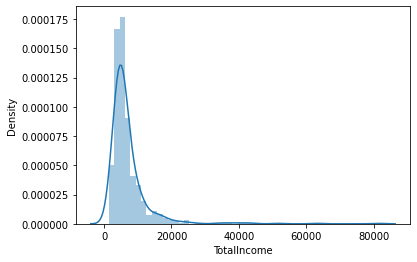

In [19]:
sns.distplot(dataset_train['TotalIncome'])

In [20]:
dataset_train['TotalIncome_log'] = np.log(dataset_train['TotalIncome'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


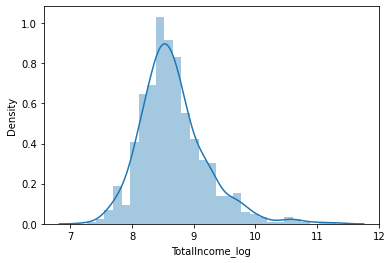

In [21]:
sns.distplot(dataset_train['TotalIncome_log'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


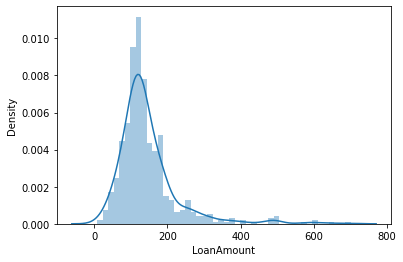

In [22]:
sns.distplot(dataset_train['LoanAmount'])

In [23]:
dataset_train['LoanAmount_log'] = np.log(dataset_train['LoanAmount'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


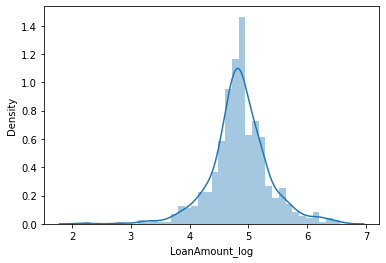

In [24]:
sns.distplot(dataset_train['LoanAmount_log'])

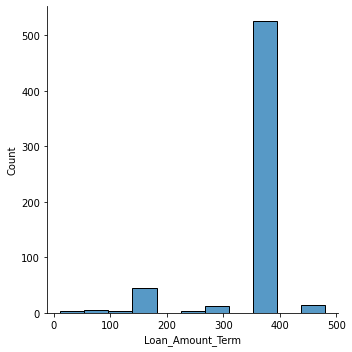

In [25]:
sns.displot(dataset_train['Loan_Amount_Term'])

In [27]:
dataset_train.drop(['ApplicantIncome', 'CoapplicantIncome','TotalIncome', 'LoanAmount'], axis=1, inplace=True)

In [28]:
dataset_test['TotalIncome'] = dataset_test['ApplicantIncome'] + dataset_test['CoapplicantIncome']
dataset_test['TotalIncome_log'] = np.log(dataset_test['TotalIncome'])
dataset_test['LoanAmount_log'] = np.log(dataset_test['LoanAmount'])
dataset_test.drop(['ApplicantIncome', 'CoapplicantIncome','TotalIncome', 'LoanAmount'], axis=1, inplace=True)

# **Data Preprocessing - 2**

In [32]:
dataset_train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome_log,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,8.674026,4.852030
1,LP001003,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N,8.714568,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,Y,8.006368,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,Y,8.505323,4.787492
4,LP001008,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,8.699515,4.948760


Encoding the Categorical Data

In [33]:
x = dataset_train.iloc[:, [1,2,3,4,5,6,7,8,10,11]].values
y = dataset_train.iloc[:, 9].values

In [34]:
print(x[0])

['Male' 'No' '0' 'Graduate' 'No' 360.0 1.0 'Urban' 8.674025985443025
 4.852030263919617]


1. OneHotEncoder

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [2, 7])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [36]:
print(x[0])

[1.0 0.0 0.0 0.0 0.0 0.0 1.0 'Male' 'No' 'Graduate' 'No' 360.0 1.0
 8.674025985443025 4.852030263919617]


2. LabelEncoder

In [37]:
from sklearn.preprocessing import LabelEncoder
le_gender, le_married, le_education, le_self_employed, le_y = LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder()
x[:, 7] = le_gender.fit_transform(x[:, 7])
x[:, 8] = le_married.fit_transform(x[:, 8])
x[:, 9] = le_education.fit_transform(x[:, 9])
x[:, 10] = le_self_employed.fit_transform(x[:, 10])

y = le_y.fit_transform(y)

In [38]:
print(x[0])

[1.0 0.0 0.0 0.0 0.0 0.0 1.0 1 0 0 0 360.0 1.0 8.674025985443025
 4.852030263919617]


In [39]:
x = np.asarray(x).astype(np.float32)

Splitting the dataset into Training set and Test set

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, [11,13,14]] = sc.fit_transform(x_train[:, [11,13,14]])
x_test[:, [11,13,14]] = sc.transform(x_test[:, [11,13,14]])

In [45]:
print(x_train[0])

[1.         0.         0.         0.         0.         1.
 0.         1.         1.         0.         0.         0.28761095
 1.         0.59274834 1.4305868 ]


In [46]:
print(y_train)

[0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0
 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1
 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1
 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1
 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1
 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1
 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0
 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0
 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 1]


# **Model Training**

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
def print_score(y_test, y_pred):
  print('Accuracy Score : '+str(round(accuracy_score(y_test, y_pred)*100,2))+' %')
  print('F1 Score : '+str(round(f1_score(y_test, y_pred)*100,2))+' %')
  print('Confusion Matrix : ',confusion_matrix(y_test,y_pred))

In [48]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train, y_train)

y_pred_lr = lr_classifier.predict(x_test)
y_proba_lr = lr_classifier.predict_proba(x_test)
print_score(y_test, y_pred_lr)
print(y_proba_lr)

Accuracy Score : 78.86 %
F1 Score : 85.87 %
Confusion Matrix :  [[18 25]
 [ 1 79]]
[[0.1229001  0.8770999 ]
 [0.10901556 0.89098444]
 [0.19126137 0.80873863]
 [0.29290003 0.70709997]
 [0.1560683  0.8439317 ]
 [0.29863199 0.70136801]
 [0.08304449 0.91695551]
 [0.14633974 0.85366026]
 [0.25238223 0.74761777]
 [0.24039092 0.75960908]
 [0.64640974 0.35359026]
 [0.23952608 0.76047392]
 [0.0944278  0.9055722 ]
 [0.22070064 0.77929936]
 [0.11329844 0.88670156]
 [0.17038569 0.82961431]
 [0.25758486 0.74241514]
 [0.17863524 0.82136476]
 [0.15910859 0.84089141]
 [0.09148562 0.90851438]
 [0.20242702 0.79757298]
 [0.09710547 0.90289453]
 [0.11068501 0.88931499]
 [0.17440565 0.82559435]
 [0.23295699 0.76704301]
 [0.35867367 0.64132633]
 [0.37532911 0.62467089]
 [0.19022701 0.80977299]
 [0.30557358 0.69442642]
 [0.12519276 0.87480724]
 [0.12258303 0.87741697]
 [0.08378399 0.91621601]
 [0.12484579 0.87515421]
 [0.28555731 0.71444269]
 [0.35906759 0.64093241]
 [0.92706231 0.07293769]
 [0.20785303 0.79

# **Predicting the Test Set**

Training using Logistic Regression on whole dataset

In [49]:
x_whole = x
y_whole = y

In [50]:
from sklearn.preprocessing import StandardScaler
sc_whole = StandardScaler()
x_whole[:, [11,13,14]] = sc_whole.fit_transform(x_whole[:, [11,13,14]])

In [51]:
final_model = LogisticRegression()
final_model.fit(x_whole, y_whole)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Processing the Test data for predictions

In [53]:
dataset_test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome_log,LoanAmount_log
0,LP001015,Male,Yes,0,Graduate,No,360.0,1.0,Urban,8.651724,4.700480
1,LP001022,Male,Yes,1,Graduate,No,360.0,1.0,Urban,8.428581,4.836282
2,LP001031,Male,Yes,2,Graduate,No,360.0,1.0,Urban,8.824678,5.337538
3,LP001035,Male,Yes,2,Graduate,No,360.0,1.0,Urban,8.494129,4.605170
4,LP001051,Male,No,0,Not Graduate,No,360.0,1.0,Urban,8.094378,4.356709


In [52]:
test_data = dataset_test.iloc[:, 1:].values

In [54]:
print(test_data)

[['Male' 'Yes' '0' ... 'Urban' 8.651724084373843 4.700480365792417]
 ['Male' 'Yes' '1' ... 'Urban' 8.428580533059634 4.836281906951478]
 ['Male' 'Yes' '2' ... 'Urban' 8.824677891164198 5.337538079701318]
 ...
 ['Male' 'No' '0' ... 'Semiurban' 8.564649132572534 4.836281906951478]
 ['Male' 'Yes' '0' ... 'Rural' 8.9082888855571 5.062595033026967]
 ['Male' 'No' '0' ... 'Rural' 9.126958763037132 4.584967478670572]]


In [55]:
test_data = np.array(ct.transform(test_data))

In [56]:
test_data[:, 7] = le_gender.fit_transform(test_data[:, 7])
test_data[:, 8] = le_married.fit_transform(test_data[:, 8])
test_data[:, 9] = le_education.fit_transform(test_data[:, 9])
test_data[:, 10] = le_self_employed.fit_transform(test_data[:, 10])

In [62]:
print(test_data[0])

[ 1.          0.          0.          0.          0.          0.
  1.          1.          1.          0.          0.          0.2732313
  1.         -0.03247818 -0.31632867]


In [63]:
print(x_whole[0])

[ 1.          0.          0.          0.          0.          0.
  1.          1.          0.          0.          0.          0.2732313
  1.          0.00846765 -0.01053276]


In [60]:
test_data[:, [11,13,14]] = sc_whole.transform(test_data[:, [11,13,14]])

In [61]:
test_data = np.asarray(test_data).astype(np.float32)

Predicting the results of Test.csv

In [64]:
pred_data = final_model.predict(test_data)

In [65]:
pred_data = le_y.inverse_transform(pred_data)

Exporting the .csv file

In [66]:
data = {"Loan_ID":dataset_test.iloc[:, 0].values, "Loan_Status":pred_data}
pd.DataFrame(data).to_csv('./drive/My Drive/Analytics Vidhya Challenges/Loan Prediction/predictions.csv', index=False)